# Data Pre-processing & Cleaning for Banking and marketing




**Important Documentation**
1. <a href="https://scikit-learn.org/stable//">scikit learn</a>
2. [sklearn regression metrics](https://https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics)
3. [Pearsonr](https://https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html)
4. [Shapiro ](https://www.spss-tutorials.com/spss-shapiro-wilk-test-for-normality/)

In [ ]:
# Line Wrapping in Collaboratory Google results
# put this in the first cell of your notebook

from IPython.display import HTML, display

def set_css():
  display(HTML('''
  <style>
    pre {
        white-space: pre-wrap;
    }
  </style>
  '''))
get_ipython().events.register('pre_run_cell', set_css)

### **Mount Google Drive**
**Important**:
Remember to re-mount for each time a new dataset is added to Google Drive

In [ ]:
import io
import requests
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


### **1. Handle Missing Data**
    - Removing of missing data (Banking_Marketing.csv)
    - Imputation (Banking_Marketing.csv)
    - Removing Outliers (german_credit_data.csv)

Dataset import as:
- Banking_Marketing_df
- german_credit_df

In [ ]:
# Import dataset
import pandas as pd
DATA_DIR_1 = "/content/gdrive/MyDrive/Colab Notebooks/220919-ITS61504/Banking_Marketing.csv"
Banking_Marketing_df = pd.read_csv (DATA_DIR_1, header=0)

### **1.1 - Removing of Data**

In [ ]:
# Determine the datatype of Each Column by using dtypes
print (Banking_Marketing_df.dtypes)

age               float64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration          float64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
y                   int64
dtype: object


In [ ]:
print("Find missing value of each column using isna()")
print (Banking_Marketing_df.isna().sum())

Find missing value of each column using isna()
age               2
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           6
month             0
day_of_week       0
duration          7
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64


In [ ]:
print("\nRemove all rows with missing data by using dropna()")
data = Banking_Marketing_df.dropna ()
print(data.isna().sum())


Remove all rows with missing data by using dropna()
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64


In [ ]:
print(Banking_Marketing_df.isna().sum())

age               2
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           6
month             0
day_of_week       0
duration          7
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64


### **1.2 - Imputation**
Dataset: Banking_Marketing.csv

In [ ]:
# Computation of the Mean value by using mean ()
mean_age = Banking_Marketing_df.age.mean ()
print()
print ("Mean age: %.2f" % mean_age)

# Impute the missing data with its mean by using fillna ()
Banking_Marketing_df.age.fillna(mean_age, inplace=True)
print("\nImpute missing data with mean value:")
print (Banking_Marketing_df.isna().sum())


Mean age: 40.02

Impute missing data with mean value:
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           6
month             0
day_of_week       0
duration          7
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64


In [ ]:
# Computation of mean value by using mean ()
mean_duration = Banking_Marketing_df.duration.mean()
print ("\nMean duration: %.2f" % mean_duration)


Mean duration: 258.27


In [ ]:
# Computation of Median value by using median ()
# used median because the 'duration' variable is too diverse
median_duration = Banking_Marketing_df.duration.median()
print ("\nMedian duration: %.2f" % median_duration)

# Impute the missing data with its median by using fillna ()
Banking_Marketing_df.duration.fillna(median_duration, inplace=True)
print("\nImpute missing data with median value:")
print (Banking_Marketing_df.isna().sum())


Median duration: 180.00

Impute missing data with median value:
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           6
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64


In [ ]:
# Computation of the Mean value by using mean ()
mean_age = Banking_Marketing_df.age.mean ()
print()
print ("Mean age: %.2f" % mean_age)

# Impute the missing data with its mean by using fillna ()
Banking_Marketing_df.age.fillna(mean_age, inplace=True)
print("\nImpute missing data with mean value:")
print (Banking_Marketing_df.isna().sum())

# Computation of Median value by using median ()
# used median because the 'duration' variable is too diverse
median_duration = Banking_Marketing_df.duration.median()
print ("\nMedian duration: %.2f" % median_duration)

# Impute the missing data with its median by using fillna ()
Banking_Marketing_df.duration.fillna(median_duration, inplace=True)
print("\nImpute missing data with median value:")
print (Banking_Marketing_df.isna().sum())

# Impute Categorical Data with its mode by using mode ()
# find out the mode
mode_contact = Banking_Marketing_df.contact.mode()[0]
print("\nImpute categorical data with its mode:")
print (mode_contact)

# impute using fillna. Used mode to find the most popular contact
Banking_Marketing_df.contact.fillna (mode_contact, inplace = True)
print("\nImpute missing data with mode (most popular contact):")
print (Banking_Marketing_df.isna().sum())


Mean age: 40.02

Impute missing data with mean value:
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           6
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

Median duration: 180.00

Impute missing data with median value:
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           6
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

Impute catego

### **1.3 - Removing Outliers**
Dataset: german_credit_data.csv

In [ ]:
DATA_DIR_2 = "/content/gdrive/MyDrive/Colab Notebooks/220919-ITS61504/german_credit_data.csv"
german_credit_df = pd.read_csv (DATA_DIR_2, header=0)

In [ ]:
german_credit_df.shape

(1000, 10)

IQR: 15.00
Lower_Fence: 4.50
Upper_Fence: 64.50

Display Outliers
     Unnamed: 0  Age     Sex  Job Housing Saving accounts Checking account  \
0             0   67    male    2     own             NaN           little   
75           75   66    male    3    free          little           little   
137         137   66    male    1     own      quite rich         moderate   
163         163   70    male    3    free          little         moderate   
179         179   65    male    2     own          little           little   
186         186   74  female    3    free          little         moderate   
187         187   68    male    0    free          little         moderate   
213         213   66    male    3     own          little             rich   
330         330   75    male    3    free          little           little   
430         430   74    male    1     own          little              NaN   
438         438   65    male    0     own          little           little  

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


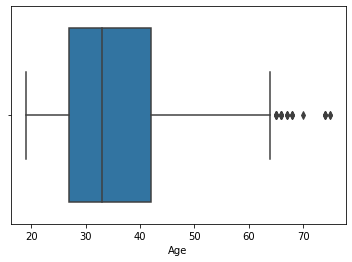

In [ ]:
# Display a BoxPlot
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sbn
sbn.boxplot(german_credit_df['Age'])
# sbn.boxplot(german_credit_df['Age'], showfliers = False)

# Compute the Interquartile Range (IQR)
Q1 = german_credit_df['Age'].quantile(0.25)
Q3 = german_credit_df['Age'].quantile(0.75)
IQR = Q3 - Q1
print ("IQR: %.2f" %IQR)

# Calculate the Lower and Upper Fence
Lower_Fence = Q1 - (1.5 * IQR)
print ("Lower_Fence: %.2f" %Lower_Fence)
Upper_Fence = Q3 + (1.5 * IQR)
print ("Upper_Fence: %.2f" %Upper_Fence)

# Display Outliers and Filtering Out the Outliers
print("\nDisplay Outliers")
print (german_credit_df[((german_credit_df["Age"] < Lower_Fence) | (german_credit_df["Age"] > Upper_Fence))])

# display data with outliers filtered out, use ~ to filter
print("\nDisplay data without outliers")
print (german_credit_df[~((german_credit_df["Age"] < Lower_Fence) | (german_credit_df["Age"] > Upper_Fence))])

IQR: 15.00
Lower_Fence: 4.50
Upper_Fence: 64.50


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


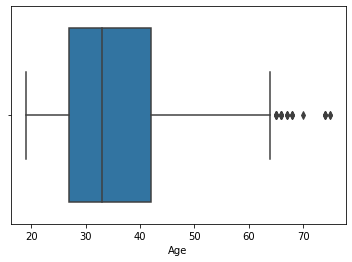

In [ ]:
# Display a BoxPlot
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sbn
sbn.boxplot(german_credit_df['Age'])
# sbn.boxplot(german_credit_df['Age'], showfliers = False)

# Compute the Interquartile Range (IQR)
Q1 = german_credit_df['Age'].quantile(0.25)
Q3 = german_credit_df['Age'].quantile(0.75)
IQR = Q3 - Q1
print ("IQR: %.2f" %IQR)

# Calculate the Lower and Upper Fence
Lower_Fence = Q1 - (1.5 * IQR)
print ("Lower_Fence: %.2f" %Lower_Fence)
Upper_Fence = Q3 + (1.5 * IQR)
print ("Upper_Fence: %.2f" %Upper_Fence)

In [ ]:
# Display Outliers and Filtering Out the Outliers
print("\nDisplay Outliers")
print (german_credit_df[((german_credit_df["Age"] < Lower_Fence) | (german_credit_df["Age"] > Upper_Fence))])


Display Outliers
     Unnamed: 0  Age     Sex  Job Housing Saving accounts Checking account  \
0             0   67    male    2     own             NaN           little   
75           75   66    male    3    free          little           little   
137         137   66    male    1     own      quite rich         moderate   
163         163   70    male    3    free          little         moderate   
179         179   65    male    2     own          little           little   
186         186   74  female    3    free          little         moderate   
187         187   68    male    0    free          little         moderate   
213         213   66    male    3     own          little             rich   
330         330   75    male    3    free          little           little   
430         430   74    male    1     own          little              NaN   
438         438   65    male    0     own          little           little   
536         536   75  female    3     own     

In [ ]:
# display data with outliers filtered out, use ~ to filter
print("\nDisplay data without outliers")
print (german_credit_df[~((german_credit_df["Age"] < Lower_Fence) | (german_credit_df["Age"] > Upper_Fence))])


Display data without outliers
     Unnamed: 0  Age     Sex  Job Housing Saving accounts Checking account  \
1             1   22  female    2     own          little         moderate   
2             2   49    male    1     own          little              NaN   
3             3   45    male    2    free          little           little   
4             4   53    male    2    free          little           little   
5             5   35    male    1    free             NaN              NaN   
..          ...  ...     ...  ...     ...             ...              ...   
995         995   31  female    1     own          little              NaN   
996         996   40    male    3     own          little           little   
997         997   38    male    2     own          little              NaN   
998         998   23    male    2    free          little           little   
999         999   27    male    2     own        moderate         moderate   

     Credit amount  Duration    

### **Why Seaborn Boxplot still showing outliers, after removing the outliers?**
Seaborn uses inter-quartile range to detect the outliers.
When you remove outliers, the number of data changes thus its quantile changes
> - means lower range and upper range changes
> - thus it is again showing outliers

Let's investigate by computing a new quantile range after remove the outliers.

**Before remove outliers:**
> - IQR: 15.00
> - Lower_Fence: 4.50
> - Upper_Fence: <font color = blue > 64.50

**After remove outliers:**
> - IQRb: 14.00
> - Lower_Fence: 6.00
> - Upper_Fence: <font color = blue > 63.00

The new upper fence now is at 63, if you check the condition based on the **new upper and lower fence**, you will see there a 5 rows with outliers
(german_credit_remOutliers["Age"] < Lower_Fence_b) | (german_credit_remOutliers["Age"] > Upper_Fence_b)

But if you check the condition against the firstly calculated upper and lower fence, you will get an **empty array**
print (german_credit_remOutliers[((german_credit_remOutliers["Age"] < Lower_Fence) | (german_credit_remOutliers["Age"] > Upper_Fence))])

### What does it mean?
The outliers are actually removed (for the attribute age of the dataframe), but Seaborn boxplot shows the outliers based on the newly calculated inter-quartile range.

In [ ]:
german_credit_remOutliers = (german_credit_df[~((german_credit_df["Age"] < Lower_Fence) | (german_credit_df["Age"] > Upper_Fence))])
german_credit_remOutliers.shape

(977, 10)

In [ ]:
# Compute new quantile range after remove outliers
# Compute the Interquartile Range (IQR)
Q1b = german_credit_remOutliers['Age'].quantile(0.25)
Q3b = german_credit_remOutliers['Age'].quantile(0.75)
IQRb = Q3b - Q1b
print ("IQRb: %.2f" %IQRb)

# Calculate the Lower and Upper Fence
Lower_Fence_b = Q1b - (1.5 * IQRb)
print ("Lower_Fence: %.2f" %Lower_Fence_b)
Upper_Fence_b = Q3 + (1.5 * IQRb)
print ("Upper_Fence: %.2f" %Upper_Fence_b)

IQRb: 14.00
Lower_Fence: 6.00
Upper_Fence: 63.00


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


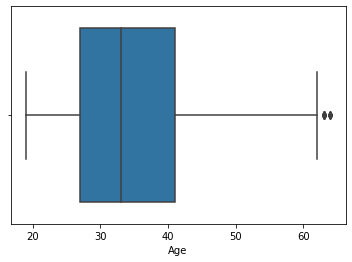

In [ ]:
sbn.boxplot(german_credit_remOutliers['Age'])
# Use showfliers=False if you want to disable outliers from boxplot

In [ ]:
# Check condition based on the firstly calculated IQR → results return empty df
# Display Outliers and Filtering Out the Outliers
print("\nDisplay Outliers")
print (german_credit_remOutliers[((german_credit_remOutliers["Age"] < Lower_Fence) | (german_credit_remOutliers["Age"] > Upper_Fence))])


Display Outliers
Empty DataFrame
Columns: [Unnamed: 0, Age, Sex, Job, Housing, Saving accounts, Checking account, Credit amount, Duration, Purpose]
Index: []


In [ ]:
# Check condition based on the newly calculated IQR → results return 5 rows with outliers
# Note that the age 64 > new upper fence 63
# Display Outliers and Filtering Out the Outliers
print("\nDisplay Outliers")
print (german_credit_remOutliers[((german_credit_remOutliers["Age"] < Lower_Fence_b) | (german_credit_remOutliers["Age"] > Upper_Fence_b))])


Display Outliers
     Unnamed: 0  Age     Sex  Job Housing Saving accounts Checking account  \
219         219   64  female    2     own          little              NaN   
629         629   64    male    1     own             NaN              NaN   
678         678   64    male    1    rent          little           little   
976         976   64  female    2     own          little         moderate   
987         987   64  female    2     own        moderate              NaN   

     Credit amount  Duration    Purpose  
219           1364        10        car  
629           3832         9  education  
678           2384        24   radio/TV  
976            753         6   radio/TV  
987           1409        13   radio/TV  


### **2. Data Integration**
Dataset:  
1. student.csv
2. marks.csv

In [ ]:
# Import dataset
import pandas as pd
DATA_DIR_3 = "/content/gdrive/MyDrive/Colab Notebooks/220919-ITS61504/student.csv"
DATA_DIR_4 = "/content/gdrive/MyDrive/Colab Notebooks/220919-ITS61504/marks.csv"
student_df = pd.read_csv (DATA_DIR_3, header=0)
marks_df = pd.read_csv (DATA_DIR_4, header=0)

In [ ]:
#Checking of Data
print (student_df.head())
print (marks_df.head())

# Merging of DataFrame using the pd.merge ()
df = pd.merge(student_df, marks_df, on = "Student_id")
print (df.head (10))

   Student_id  Age  Gender      Grade Employed
0           1   19    Male  1st Class      yes
1           2   20  Female  2nd Class       no
2           3   18    Male  1st Class       no
3           4   21  Female  2nd Class       no
4           5   19    Male  1st Class       no
   Student_id  Mark     City
0           1    95  Chennai
1           2    70    Delhi
2           3    98   Mumbai
3           4    75     Pune
4           5    89    Kochi
   Student_id  Age  Gender      Grade Employed  Mark     City
0           1   19    Male  1st Class      yes    95  Chennai
1           2   20  Female  2nd Class       no    70    Delhi
2           3   18    Male  1st Class       no    98   Mumbai
3           4   21  Female  2nd Class       no    75     Pune
4           5   19    Male  1st Class       no    89    Kochi
5           6   20    Male  2nd Class      yes    69  Gwalior
6           7   19  Female  3rd Class      yes    52   Bhopal
7           8   21    Male  3rd Class      yes  

### **3. Data Transformation**

    - Replacement of Categorical Data with Numbers (student.csv)
    - Label encoding (Banking_Marketing.csv)
    - Transforming Data of Different Scale (Wholesale customers data.csv)

**Numerical Data**
- Discrete: Numerical data that is countable
- Continuous: Numerical data that is measurable  

**Categorical Data**
- Ordered: Categorical data that is orderly or structured
- Nominal: Categorical data that has no order or structure

Dataset:  
1. student.csv
2. Banking_Marketing.csv
3. Wholesale customers data.csv


In [ ]:
import numpy as np

# Separating Categorical Columns from Dataframe using select_dtypes()
df_categorical = student_df.select_dtypes(exclude=[np.number]) # exclude numerical using numpy
print(df_categorical)

     Gender      Grade Employed
0      Male  1st Class      yes
1    Female  2nd Class       no
2      Male  1st Class       no
3    Female  2nd Class       no
4      Male  1st Class       no
..      ...        ...      ...
227  Female  1st Class       no
228    Male  2nd Class       no
229    Male  3rd Class      yes
230  Female  1st Class      yes
231    Male  3rd Class      yes

[232 rows x 3 columns]


**Finding the Frequency of Distribution to Each Categorical Column**

In [ ]:
print(df_categorical['Grade'].unique())

['1st Class' '2nd Class' '3rd Class']


In [ ]:
print(df_categorical.Grade.value_counts())

2nd Class    80
3rd Class    80
1st Class    72
Name: Grade, dtype: int64


In [ ]:
print(df_categorical.Gender.value_counts())

Male      136
Female     96
Name: Gender, dtype: int64


In [ ]:
print(df_categorical.Employed.value_counts())

no     133
yes     99
Name: Employed, dtype: int64


### **3.1 - Replacing Categorical Data with Numbers**

The following code may produce warning, but it's okay, still able to replace categorical data with numbers.

Warning:

*A value is trying to be set on a copy of a slice from a DataFrame*

*See the caveats in the documentation: https: ...*

In [ ]:
df_categorical.Grade.replace({"1st Class": 1, "2nd Class": 2, "3rd Class": 3 }, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
df_categorical.Gender.replace({"Male": 0, "Female": 1}, inplace=True)

In [ ]:
df_categorical.Employed.replace({"yes": 1, "no": 2}, inplace=True)

In [ ]:
# Let's check the output after replace categorical with number
print (df_categorical.head())

   Gender  Grade  Employed
0       0      1         1
1       1      2         2
2       0      1         2
3       1      2         2
4       0      1         2


### **3.2 - Label Encoding**

This technique is used to replace each value in a categorical column with numbers from 0 to N-1.

Dataset:
- Banking_Marketing.csv  
(this dataset already imported previously and used as 'Banking_Marketing_df')

In [ ]:
# Read Dataset and import LabelEncoder from sklearn.preprocessing package
from sklearn.preprocessing import LabelEncoder

print (Banking_Marketing_df.head())

    age          job  marital          education  default housing loan  \
0  44.0  blue-collar  married           basic.4y  unknown     yes   no   
1  53.0   technician  married            unknown       no      no   no   
2  28.0   management   single  university.degree       no     yes   no   
3  39.0     services  married        high.school       no      no   no   
4  55.0      retired  married           basic.4y       no     yes   no   

    contact month day_of_week  ...  campaign  pdays  previous     poutcome  \
0  cellular   aug         thu  ...         1    999         0  nonexistent   
1  cellular   nov         fri  ...         1    999         0  nonexistent   
2  cellular   jun         thu  ...         3      6         2      success   
3  cellular   apr         fri  ...         2    999         0  nonexistent   
4  cellular   aug         fri  ...         1      3         1      success   

  emp_var_rate  cons_price_idx  cons_conf_idx  euribor3m  nr_employed  y  
0          

In [ ]:
# Remove Missing Data
Banking_Marketing_df = Banking_Marketing_df.dropna()

In [ ]:
# Select Non-Numerical Columns
data_column_category = Banking_Marketing_df.select_dtypes (exclude=[np.number]).columns
print (data_column_category)
print (Banking_Marketing_df[data_column_category].head())

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')
           job  marital          education  default housing loan   contact  \
0  blue-collar  married           basic.4y  unknown     yes   no  cellular   
1   technician  married            unknown       no      no   no  cellular   
2   management   single  university.degree       no     yes   no  cellular   
3     services  married        high.school       no      no   no  cellular   
4      retired  married           basic.4y       no     yes   no  cellular   

  month day_of_week     poutcome  
0   aug         thu  nonexistent  
1   nov         fri  nonexistent  
2   jun         thu      success  
3   apr         fri  nonexistent  
4   aug         fri      success  


In [ ]:
# Iterate through column to convert to numeric data using LabelEncoder ()
label_encoder = LabelEncoder()
for i in data_column_category:
    Banking_Marketing_df[i] = label_encoder.fit_transform (Banking_Marketing_df[i])

In [ ]:
print("Label Encoder Data:")
print(Banking_Marketing_df.head())

Label Encoder Data:
    age  job  marital  education  default  housing  loan  contact  month  \
0  44.0    1        1          1        1        2     1        0      1   
1  53.0    9        1          8        0        0     1        0      7   
2  28.0    4        2          7        0        2     1        0      4   
3  39.0    7        1          4        0        0     1        0      0   
4  55.0    5        1          1        0        2     1        0      1   

   day_of_week  ...  campaign  pdays  previous  poutcome  emp_var_rate  \
0            2  ...         1    999         0         1           1.4   
1            0  ...         1    999         0         1          -0.1   
2            2  ...         3      6         2         2          -1.7   
3            0  ...         2    999         0         1          -1.8   
4            0  ...         1      3         1         2          -2.9   

   cons_price_idx  cons_conf_idx  euribor3m  nr_employed  y  
0          93.44

### **3.3 - Transforming Data of Different Scale**

Dataset:
- Wholesale customers data.csv

In [ ]:
DATA_DIR_5 = "/content/gdrive/MyDrive/Colab Notebooks/220919-ITS61504/Wholesale customers data.csv"

In [ ]:
# Read Dataset
from sklearn import preprocessing
WholesaleData_df = pd.read_csv (DATA_DIR_5, header=0)
print (WholesaleData_df.head())

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


In [ ]:
null_ = WholesaleData_df.isna().any()

In [ ]:
dtypes = WholesaleData_df.dtypes

In [ ]:
# Check for Missing Data
null_ = WholesaleData_df.isna().any()
dtypes = WholesaleData_df.dtypes
info = pd.concat ([null_,dtypes], axis = 1, keys = ['Null', 'type'])
print(info) # This is different way of viewing data

                   Null   type
Channel           False  int64
Region            False  int64
Fresh             False  int64
Milk              False  int64
Grocery           False  int64
Frozen            False  int64
Detergents_Paper  False  int64
Delicassen        False  int64


In [ ]:
# Perform Standard Scaling and Implement fit_transform () method
std_scale = preprocessing.StandardScaler().fit_transform (WholesaleData_df)
scaled_frame = pd.DataFrame (std_scale, columns = WholesaleData_df.columns)
print (scaled_frame.head())

    Channel    Region     Fresh      Milk   Grocery    Frozen  \
0  1.448652  0.590668  0.052933  0.523568 -0.041115 -0.589367   
1  1.448652  0.590668 -0.391302  0.544458  0.170318 -0.270136   
2  1.448652  0.590668 -0.447029  0.408538 -0.028157 -0.137536   
3 -0.690297  0.590668  0.100111 -0.624020 -0.392977  0.687144   
4  1.448652  0.590668  0.840239 -0.052396 -0.079356  0.173859   

   Detergents_Paper  Delicassen  
0         -0.043569   -0.066339  
1          0.086407    0.089151  
2          0.133232    2.243293  
3         -0.498588    0.093411  
4         -0.231918    1.299347  


In [ ]:
# Using MinMax Scaler Method
minmax_scale = preprocessing.MinMaxScaler().fit_transform (WholesaleData_df)
scaled_frame = pd.DataFrame (minmax_scale, columns = WholesaleData_df.columns)
print (scaled_frame.head())

   Channel  Region     Fresh      Milk   Grocery    Frozen  Detergents_Paper  \
0      1.0     1.0  0.112940  0.130727  0.081464  0.003106          0.065427   
1      1.0     1.0  0.062899  0.132824  0.103097  0.028548          0.080590   
2      1.0     1.0  0.056622  0.119181  0.082790  0.039116          0.086052   
3      0.0     1.0  0.118254  0.015536  0.045464  0.104842          0.012346   
4      1.0     1.0  0.201626  0.072914  0.077552  0.063934          0.043455   

   Delicassen  
0    0.027847  
1    0.036984  
2    0.163559  
3    0.037234  
4    0.108093  


**P/s:**

**StandardScaler** follows Standard Normal Distribution (SND). Therefore, it makes mean = 0 and scales the data to unit variance.

**MinMaxScaler** scales all the data features in the range [0, 1] or else in the range [-1, 1] if there are negative values in the dataset

### **4. Data Discretization**
A process of converting continuous data into discrete buckets by grouping it.

Benefits of Data Discretization:
- Easy maintainability of data
- Training of Machine Learning models will be faster and more effective

Dataset:
Student_bucketing.csv

In [ ]:
DATA_DIR_6 = "/content/gdrive/MyDrive/Colab Notebooks/220919-ITS61504/Student_bucketing.csv"

In [ ]:
StudentBucketing_df = pd.read_csv (DATA_DIR_6, header=0)
print (StudentBucketing_df.head())

   Student_id  Age      Grade Employed  marks
0           1   19  1st Class      yes     29
1           2   20  2nd Class       no     41
2           3   18  1st Class       no     57
3           4   21  2nd Class       no     29
4           5   19  1st Class       no     57


In [ ]:
# Perform Bucketing using pd.cut ()
StudentBucketing_df['bucket']=pd.cut(StudentBucketing_df['marks'], 5, labels = ['Poor', 'Below_average', 'Average', 'Above_Average','Excellent'])
print (StudentBucketing_df.head(10))

   Student_id  Age      Grade Employed  marks         bucket
0           1   19  1st Class      yes     29           Poor
1           2   20  2nd Class       no     41  Below_average
2           3   18  1st Class       no     57        Average
3           4   21  2nd Class       no     29           Poor
4           5   19  1st Class       no     57        Average
5           6   20  2nd Class      yes     53        Average
6           7   19  3rd Class      yes     78  Above_Average
7           8   21  3rd Class      yes     70  Above_Average
8           9   22  3rd Class      yes     97      Excellent
9          10   21  1st Class       no     58        Average


In [ ]:
StudentBucketing_df['Performance']=pd.cut(StudentBucketing_df['marks'], 3, labels = ['Poor', 'Average','Excellent'])
print (StudentBucketing_df.head(10))

   Student_id  Age      Grade Employed  marks         bucket Performance
0           1   19  1st Class      yes     29           Poor        Poor
1           2   20  2nd Class       no     41  Below_average        Poor
2           3   18  1st Class       no     57        Average     Average
3           4   21  2nd Class       no     29           Poor        Poor
4           5   19  1st Class       no     57        Average     Average
5           6   20  2nd Class      yes     53        Average     Average
6           7   19  3rd Class      yes     78  Above_Average   Excellent
7           8   21  3rd Class      yes     70  Above_Average     Average
8           9   22  3rd Class      yes     97      Excellent   Excellent
9          10   21  1st Class       no     58        Average     Average


In [ ]:
# Perform Bucketing using pd.cut ()
StudentBucketing_df['bucket']=pd.cut(StudentBucketing_df['marks'], 3, labels = ['Poor', 'Average', 'Excellent'])
print (StudentBucketing_df.head(10))

   Student_id  Age      Grade Employed  marks     bucket Performance
0           1   19  1st Class      yes     29       Poor        Poor
1           2   20  2nd Class       no     41       Poor        Poor
2           3   18  1st Class       no     57    Average     Average
3           4   21  2nd Class       no     29       Poor        Poor
4           5   19  1st Class       no     57    Average     Average
5           6   20  2nd Class      yes     53    Average     Average
6           7   19  3rd Class      yes     78  Excellent   Excellent
7           8   21  3rd Class      yes     70    Average     Average
8           9   22  3rd Class      yes     97  Excellent   Excellent
9          10   21  1st Class       no     58    Average     Average
